In [72]:
import pandas as pd
import numpy as np
data= pd.read_csv(r'F:\playing\oral_cancer_prediction_dataset.csv')

In [30]:
data=data.drop_duplicates()

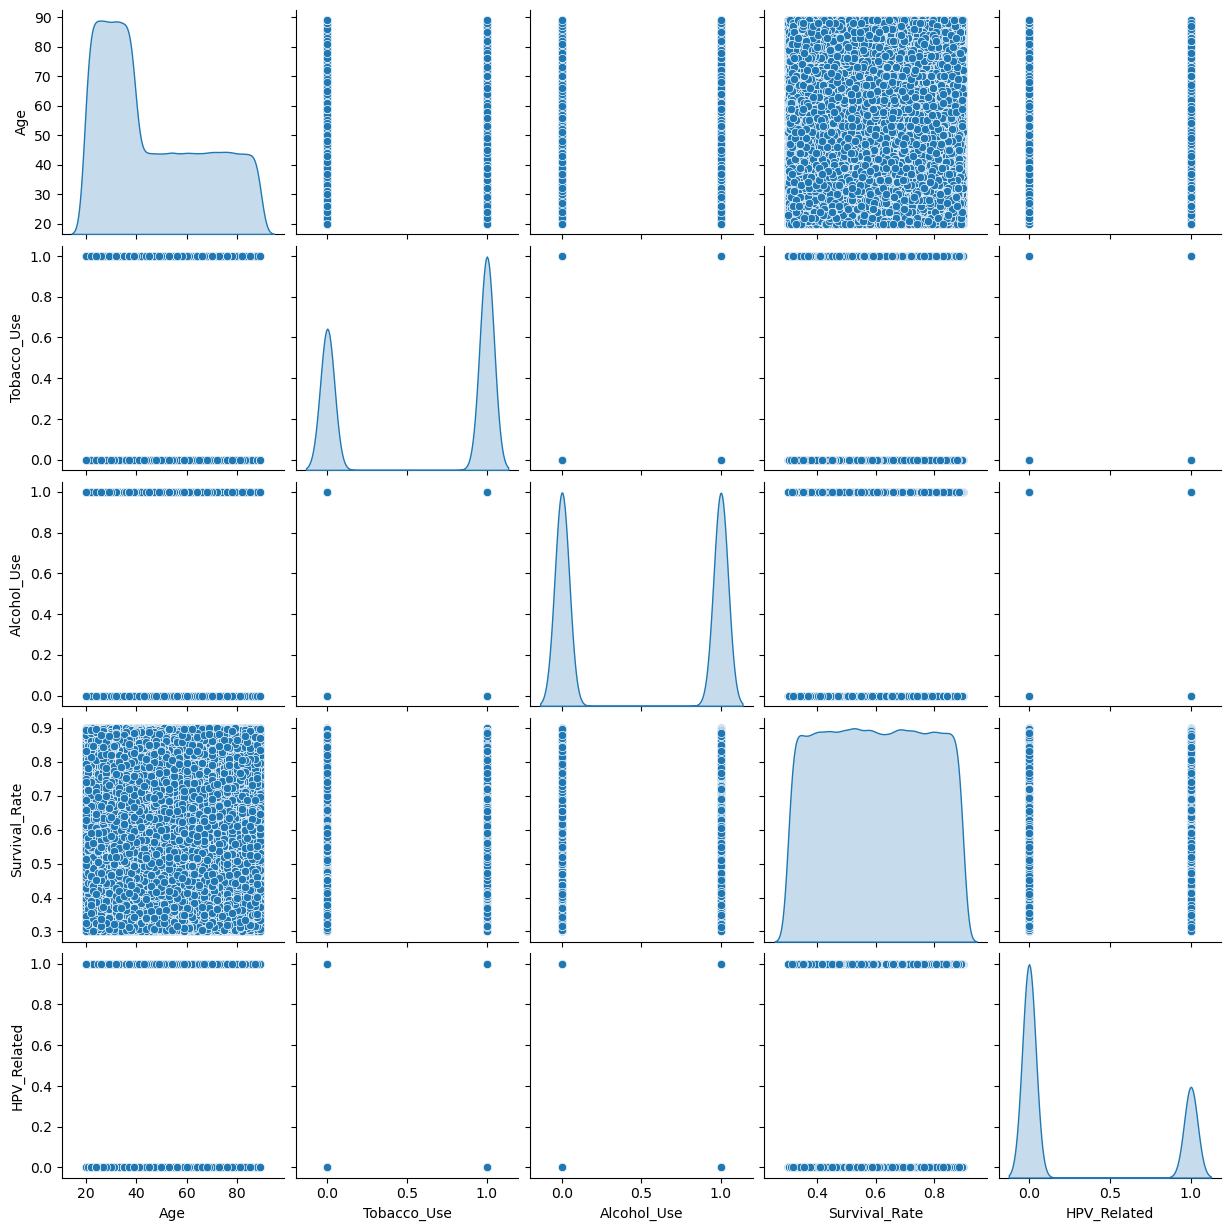

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data.drop('ID',axis=1), diag_kind='kde')

In [34]:
data.shape

(160292, 11)

In [3]:
data.columns

Index(['ID', 'Country', 'Gender', 'Age', 'Tobacco_Use', 'Alcohol_Use',
       'Socioeconomic_Status', 'Diagnosis_Stage', 'Treatment_Type',
       'Survival_Rate', 'HPV_Related'],
      dtype='object')

In [9]:
data.head()

,ID,Country,Gender,Age,Tobacco_Use,Alcohol_Use,Socioeconomic_Status,Diagnosis_Stage,Treatment_Type,Survival_Rate,HPV_Related
0,1,Ethiopia,Male,34,1,1,High,Early,Radiotherapy,0.826235,0
1,2,Turkey,Female,84,1,1,High,Moderate,Radiotherapy,0.376607,0
2,3,Turkey,Female,62,1,1,Middle,Early,Radiotherapy,0.736296,1
3,4,Tanzania,Male,48,1,1,Middle,Moderate,Combination,0.786118,0
4,5,France,Male,26,1,1,Middle,Early,Radiotherapy,0.830411,0


In [5]:
data.isnull().sum()


ID                      0
Country                 0
Gender                  0
Age                     0
Tobacco_Use             0
Alcohol_Use             0
Socioeconomic_Status    0
Diagnosis_Stage         0
Treatment_Type          0
Survival_Rate           0
HPV_Related             0
dtype: int64

In [12]:
data["Country"].value_counts()
data["Treatment_Type"].value_counts()

Treatment_Type
Surgery         48171
Radiotherapy    40237
Chemotherapy    31996
Combination     24027
Palliative      15861
Name: count, dtype: int64

In [74]:
data=data.drop(['Country'],  axis=1)


In [14]:
data.columns

Index(['ID', 'Gender', 'Age', 'Tobacco_Use', 'Alcohol_Use',
       'Socioeconomic_Status', 'Diagnosis_Stage', 'Treatment_Type',
       'Survival_Rate', 'HPV_Related'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    160292 non-null  int64  
 1   Gender                160292 non-null  object 
 2   Age                   160292 non-null  int64  
 3   Tobacco_Use           160292 non-null  int64  
 4   Alcohol_Use           160292 non-null  int64  
 5   Socioeconomic_Status  160292 non-null  object 
 6   Diagnosis_Stage       160292 non-null  object 
 7   Treatment_Type        160292 non-null  object 
 8   Survival_Rate         160292 non-null  float64
 9   HPV_Related           160292 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 12.2+ MB


In [75]:
data=pd.get_dummies(data, columns=['Gender','Treatment_Type','Socioeconomic_Status','Diagnosis_Stage'], drop_first=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           160292 non-null  int64  
 1   Age                          160292 non-null  int64  
 2   Tobacco_Use                  160292 non-null  int64  
 3   Alcohol_Use                  160292 non-null  int64  
 4   Survival_Rate                160292 non-null  float64
 5   HPV_Related                  160292 non-null  int64  
 6   Gender_Male                  160292 non-null  bool   
 7   Treatment_Type_Combination   160292 non-null  bool   
 8   Treatment_Type_Palliative    160292 non-null  bool   
 9   Treatment_Type_Radiotherapy  160292 non-null  bool   
 10  Treatment_Type_Surgery       160292 non-null  bool   
 11  Socioeconomic_Status_Low     160292 non-null  bool   
 12  Socioeconomic_Status_Middle  160292 non-null  bool   
 13 

In [18]:
data.columns

Index(['ID', 'Age', 'Tobacco_Use', 'Alcohol_Use', 'Survival_Rate',
       'HPV_Related', 'Gender_Male', 'Treatment_Type_Combination',
       'Treatment_Type_Palliative', 'Treatment_Type_Radiotherapy',
       'Treatment_Type_Surgery', 'Socioeconomic_Status_Low',
       'Socioeconomic_Status_Middle', 'Diagnosis_Stage_Late',
       'Diagnosis_Stage_Moderate'],
      dtype='object')

In [76]:
df=['ID', 'Age', 'Tobacco_Use', 'Alcohol_Use', 'Survival_Rate',
       'HPV_Related', 'Gender_Male', 'Treatment_Type_Combination',
       'Treatment_Type_Palliative', 'Treatment_Type_Radiotherapy',
       'Treatment_Type_Surgery', 'Socioeconomic_Status_Low',
       'Socioeconomic_Status_Middle', 'Diagnosis_Stage_Late',
       'Diagnosis_Stage_Moderate', 'HPV_Related']
data=data[df]
data.head()

,ID,Age,Tobacco_Use,Alcohol_Use,Survival_Rate,HPV_Related,Gender_Male,Treatment_Type_Combination,Treatment_Type_Palliative,Treatment_Type_Radiotherapy,Treatment_Type_Surgery,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,Diagnosis_Stage_Late,Diagnosis_Stage_Moderate,HPV_Related
0,1,34,1,1,0.826235,0,True,False,False,True,False,False,False,False,False,0
1,2,84,1,1,0.376607,0,False,False,False,True,False,False,False,False,True,0
2,3,62,1,1,0.736296,1,False,False,False,True,False,False,True,False,False,1
3,4,48,1,1,0.786118,0,True,True,False,False,False,False,True,False,True,0
4,5,26,1,1,0.830411,0,True,False,False,True,False,False,True,False,False,0


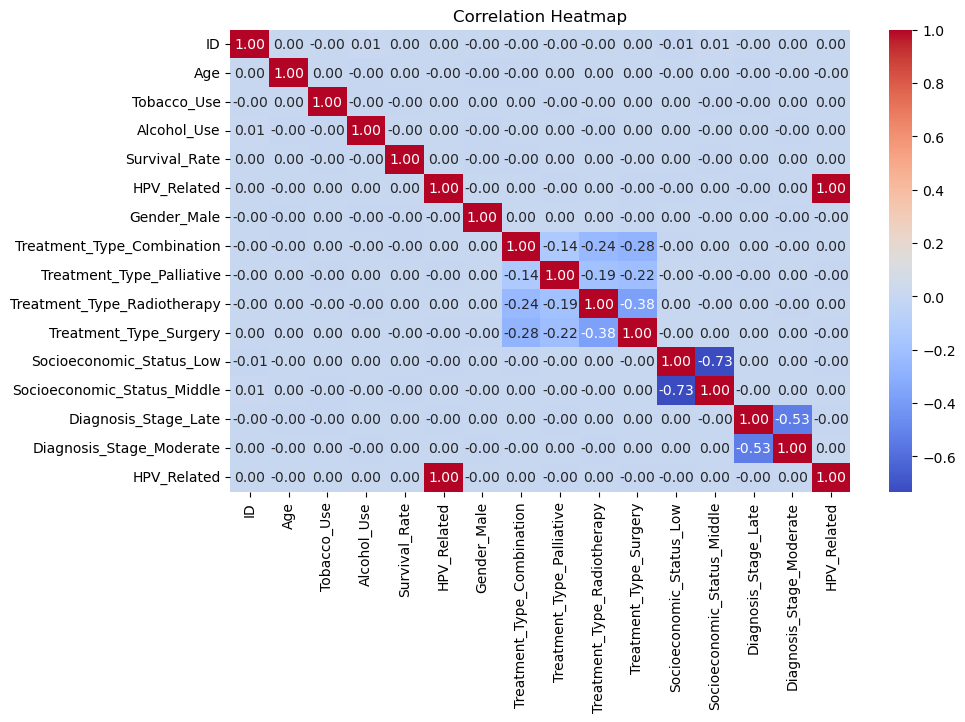

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')    
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data.drop('ID', axis=1))
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])

In [ ]:
# from sklearn.model_selection import train_test_split
# X = data_scaled.drop('Survival_Rate', axis=1)
# y = data_scaled['Survival_Rate']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((128233, 14), (32059, 14), (128233,), (32059,))

In [64]:
from sklearn.model_selection import train_test_split
X = data.drop('Survival_Rate', axis=1)
y = data['Survival_Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((128233, 15), (32059, 15), (128233,), (32059,))

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("score:", model.score(X_test, y_test))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Coefficients: [ 9.40990531e-09  1.22526257e-05 -1.05847886e-03 -2.41555611e-04
  1.17008055e-04 -1.04155935e-03 -1.60420017e-03  7.18279362e-04
  1.09165242e-03 -8.14174604e-04 -1.06505101e-03 -1.92159238e-03
  2.43017222e-03  1.53077620e-03  1.17008055e-04]
Intercept: 0.5999001252200634
score: -0.00017879658461339432
Mean Absolute Error: 0.14933611470459363
Mean Squared Error: 0.029763905184544477
R-squared: -0.00017879658461339432


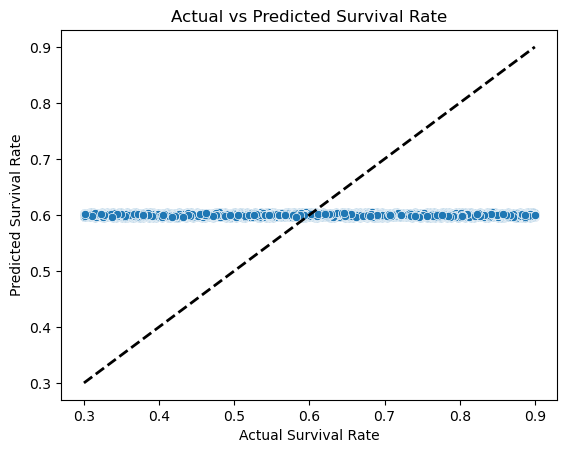

['oral_cancer_prediction_model.pkl']

In [41]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Survival Rate')
plt.ylabel('Predicted Survival Rate')
plt.title('Actual vs Predicted Survival Rate')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()
import joblib
joblib.dump(model, 'oral_cancer_prediction_model.pkl')


In [42]:
from sklearn.linear_model import Lasso,Ridge
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R-squared:", r2_score(y_test, y_pred_lasso))


Lasso Mean Absolute Error: 0.14932009838025395
Lasso Mean Squared Error: 0.029758886065141914
Lasso R-squared: -1.0135356429463727e-05


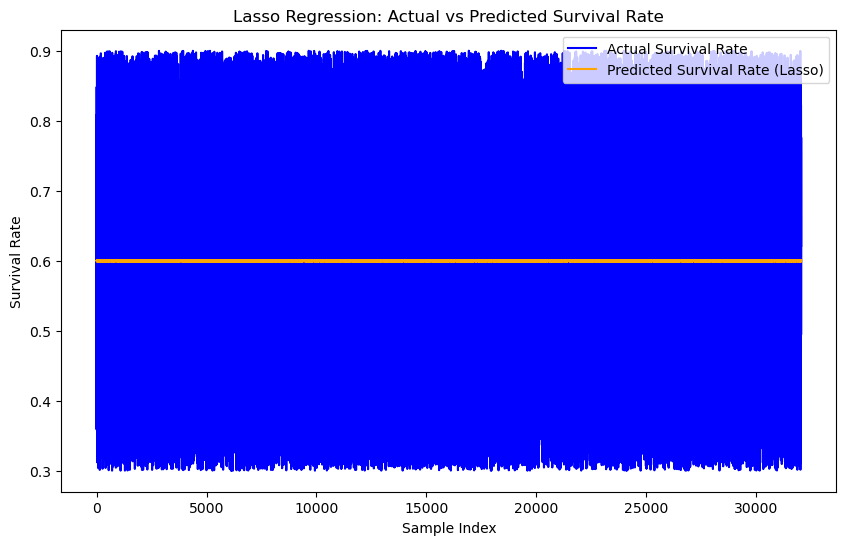

In [46]:
plt.figure(figsize=(10, 6))

plt.plot(y_test.values, label='Actual Survival Rate', color='blue')
plt.plot(y_pred_lasso, label='Predicted Survival Rate (Lasso)', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Survival Rate')
plt.title('Lasso Regression: Actual vs Predicted Survival Rate')
plt.legend()
plt.show()

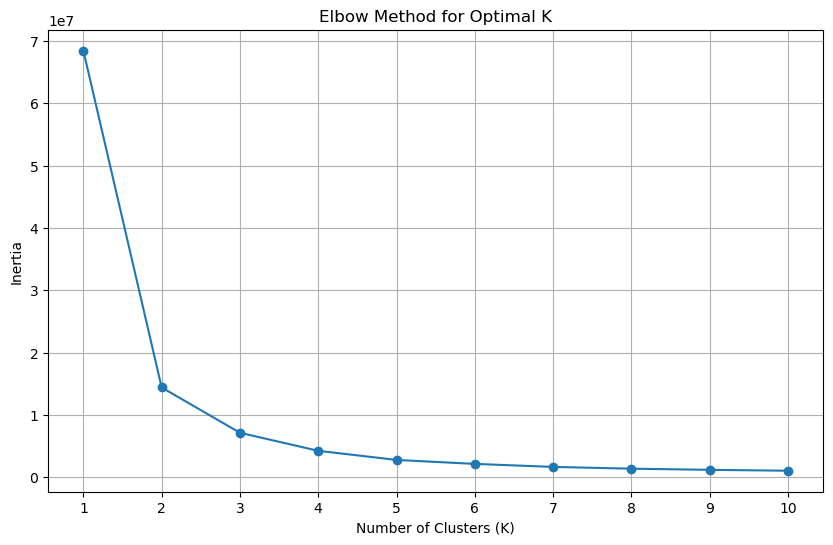

In [66]:
from sklearn.cluster import KMeans
list1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data.drop('ID', axis=1))
    list1.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), list1, marker='o')   
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()

d:\ana\envs\Tensorflwo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


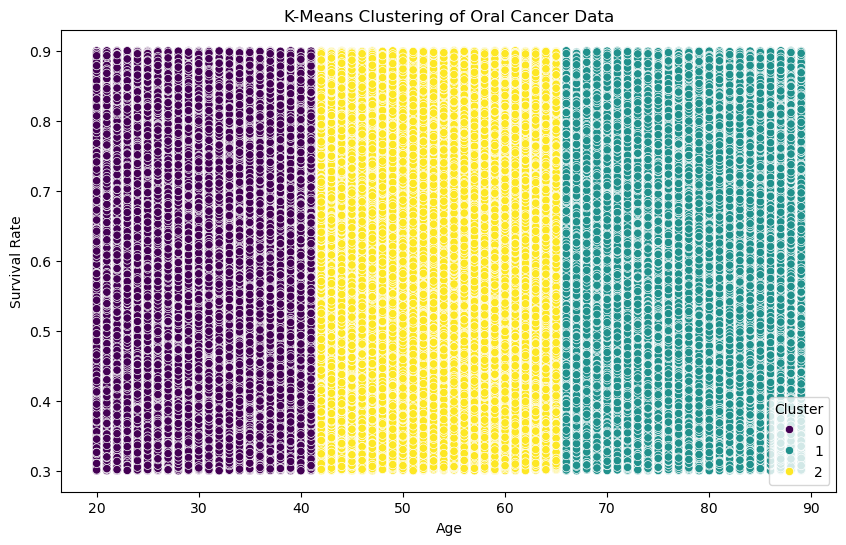

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data.drop('ID', axis=1))
data['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survival_Rate', hue='Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering of Oral Cancer Data')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.legend(title='Cluster')
plt.show()



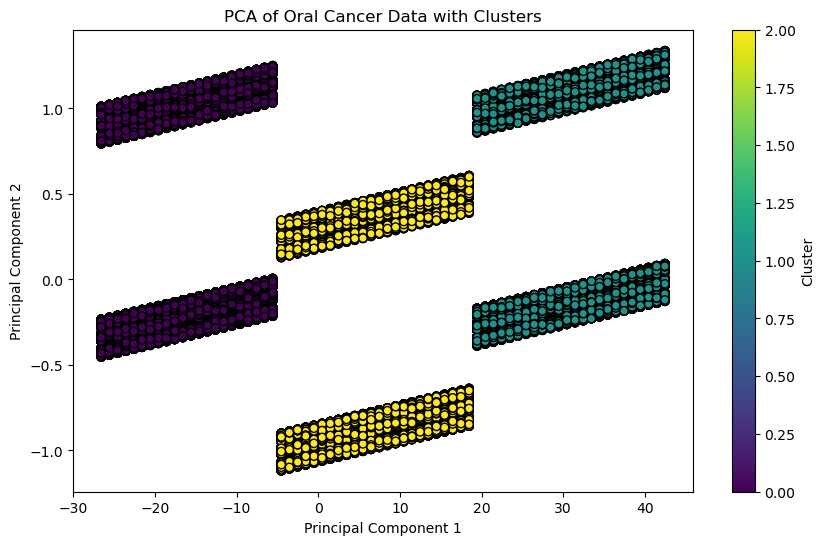

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop(['ID'], axis=1))
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', edgecolor='k')
plt.title('PCA of Oral Cancer Data with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [79]:
# Perform KMeans clustering (if not already done)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data.drop(['ID', 'Survival_Rate'], axis=1))

# Assign cluster labels to the data
data['Cluster'] = kmeans.labels_

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Display centroids as a DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=data.drop(['ID', 'Survival_Rate', 'Cluster'], axis=1).columns)
centroids_df

,Age,Tobacco_Use,Alcohol_Use,HPV_Related,Gender_Male,Treatment_Type_Combination,Treatment_Type_Palliative,Treatment_Type_Radiotherapy,Treatment_Type_Surgery,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,Diagnosis_Stage_Late,Diagnosis_Stage_Moderate,HPV_Related
0,54.502684,0.598259,0.500147,0.295030,0.664539,0.150693,0.099901,0.251689,0.300344,0.496595,0.350282,0.303148,0.395679,0.295030
1,30.124762,0.602057,0.500443,0.299750,0.671872,0.150284,0.098642,0.250078,0.300314,0.499557,0.349849,0.300936,0.399625,0.299750
2,77.942803,0.604315,0.497168,0.299284,0.671063,0.148129,0.098706,0.252610,0.301199,0.498528,0.351705,0.293869,0.400461,0.299284


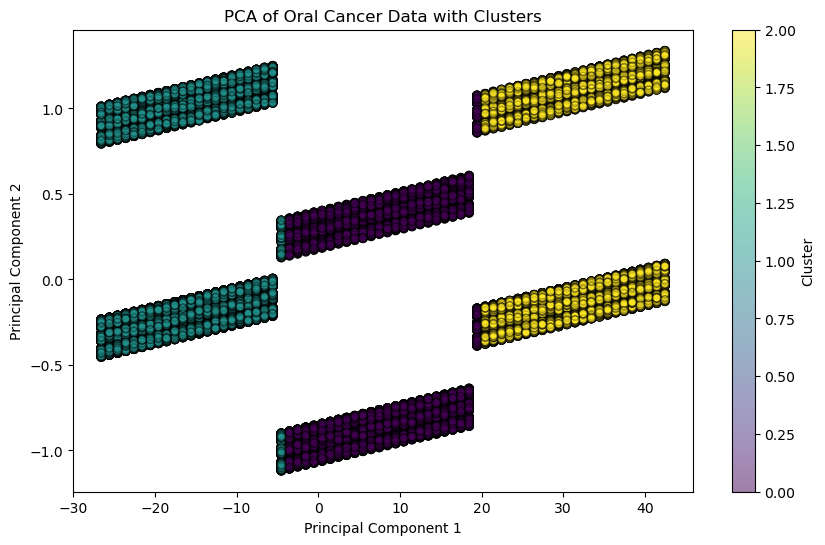

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', edgecolor='k', alpha=0.5)
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="m")
plt.title('PCA of Oral Cancer Data with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [82]:
X=data
kmeans = KMeans(n_clusters=3,init="k-means++", random_state=42)
y_kmeans=kmeans.fit_predict(X)


d:\ana\envs\Tensorflwo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


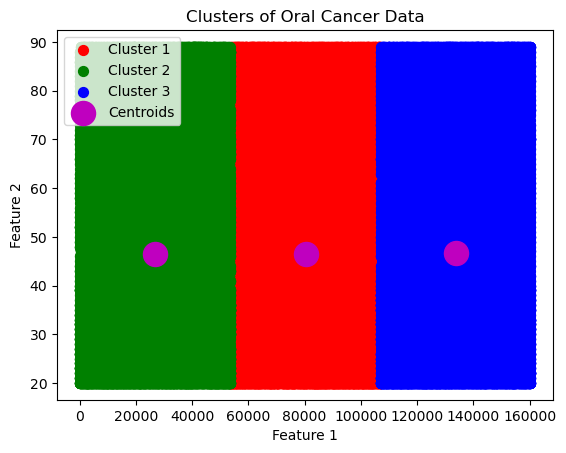

In [ ]:
plt.scatter(X.values[y_kmeans==0,0], X.values[y_kmeans==0,1], s=50, c='r')
plt.scatter(X.values[y_kmeans==1,0], X.values[y_kmeans==1,1], s=50, c="g")
plt.scatter(X.values[y_kmeans==2,0], X.values[y_kmeans==2,1], s=50, c="b")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="m")
plt.title('Clusters of Oral Cancer Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids'])
plt.show()